In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge,LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score

In [20]:
#导入数据集
dataall=pd.read_csv('data_2d.csv',sep=',')
X=dataall.iloc[:,1:11]
y=dataall.iloc[:,11]
print(X)
print(y)

        Mass  Energy  Heat_of_formation?  Electronegativity_A  \
0     83.994 -24.736              -1.693                 1.66   
1    116.116 -19.583              -0.673                 1.66   
2    209.938 -17.832              -0.486                 1.66   
3    307.196 -16.136              -0.106                 1.66   
4    210.488 -27.664              -3.303                 1.32   
5    210.488 -25.997              -2.748                 1.32   
6    242.610 -20.439              -1.592                 1.32   
7    242.610 -19.788              -1.375                 1.32   
8    336.432 -18.519              -1.349                 1.32   
9    336.432 -17.998              -1.175                 1.32   
10   433.690 -16.008              -0.697                 1.32   
11   127.948 -27.388              -1.979                 2.16   
12   160.070 -22.121              -0.921                 2.16   
13   253.892 -20.291              -0.708                 2.16   
14   351.150 -18.513     

In [21]:
#训练回归模型
n_folds=10
model_br=BayesianRidge()
model_lr=LinearRegression()
model_etc=ElasticNet()
model_svr=SVR()
model_gbr=GradientBoostingRegressor()
model_names=['BayesianRidge','LinearRegression','ElasticNet','SVR','GBR']
model_dic=[model_br,model_lr,model_etc,model_svr,model_gbr]
cv_score_list=[]
pre_y_list=[]
for model in model_dic:
    scores=cross_val_score(model,X,y,cv=n_folds)
    cv_score_list.append(scores)
    pre_y_list.append(model.fit(X,y).predict(X))

In [22]:
#模型效果指标评估
n_samples,n_features=X.shape
model_metrics_name=[explained_variance_score,mean_absolute_error,mean_squared_error,r2_score]
model_metrics_list=[]
for i in range(5):
    tmp_list=[]
    for m in model_metrics_name:
        tmp_score=m(y,pre_y_list[i])
        tmp_list.append(tmp_score)

    model_metrics_list.append(tmp_list)

df1=pd.DataFrame(cv_score_list,index=model_names)
print(df1)
df2=pd.DataFrame(model_metrics_list,index=model_names,columns=['ev','mae','mse','r2'])
print('samples: %d \t features: %d' % (n_samples,n_features))
print(70 * '-')
print('cross validation result:')
print(df1)
print(70 * '-')
print('regression metrics:')
print(df2)
print(70 * '-')
print('short name \t full name')
print('ev \t explained_variance')
print('mae \t mean_absolute_error')
print('mse \t mean_squared_error')
print('r2 \t r2')
print(70 * '-')

                         0         1         2         3         4         5  \
BayesianRidge     0.942159  0.818543  0.938306  0.989900  0.955295  0.971232   
LinearRegression  0.941400  0.816041  0.937108  0.990100  0.954296  0.970551   
ElasticNet        0.759155  0.786176  0.881267  0.705543  0.785206  0.779850   
SVR               0.001299 -0.054164  0.000591  0.032942 -0.127047 -0.175942   
GBR               0.924093  0.719290  0.936105  0.989713  0.919264  0.958005   

                         6         7         8         9  
BayesianRidge     0.859377  0.924763  0.914231  0.864389  
LinearRegression  0.859769  0.925817  0.913417  0.860292  
ElasticNet        0.615360  0.712060  0.751454  0.809522  
SVR               0.326746  0.244841 -0.051926 -0.196645  
GBR               0.835614  0.947821  0.610835  0.891293  
samples: 192 	 features: 10
----------------------------------------------------------------------
cross validation result:
                         0         1     

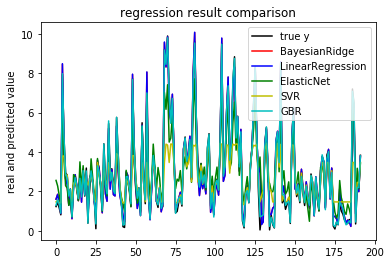

regression prediction


In [23]:
#模型可视化
plt.figure()
plt.plot(np.arange(X.shape[0]),y,color='k',label='true y')
color_list=['r','b','g','y','c']
linestyle_list=['-','.','o','v','*']

for i, pre_y in enumerate (pre_y_list):
    plt.plot(np.arange(X.shape[0]),pre_y_list[i],color_list[i],label=model_names[i])

plt.title('regression result comparison')
plt.legend(loc='upper right')
plt.ylabel('real and predicted value')
plt.show()

#模型应用
print('regression prediction')
